# Seascapes Exploratory Analysis

## Key questions to ask
+ how are seascapes distributed over water?
+ what species live in these seascapes?
+ how do these seascpes differ?

## Import modules

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Fetch Data

The URL of our resource:
```url
https://upwell.pfeg.noaa.gov/erddap/griddap/noaa_aoml_d89c_8713_c8a0.csv?CLASS%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D,P%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D
```
Generated from https://upwell.pfeg.noaa.gov/erddap/griddap/noaa_aoml_d89c_8713_c8a0.html

In [3]:
df = pd.read_csv("https://upwell.pfeg.noaa.gov/erddap/griddap/noaa_aoml_d89c_8713_c8a0.csv?CLASS%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D,P%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D")

In [ ]:
df

In [ ]:
df.P.unique()

In [ ]:
df.CLASS[df.CLASS.notna()]

Let us fetch some new dataset.

Fetched from: https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.graph?CLASS[(2022-07-20T12:00:00Z)][(23.025):(28.025)][(-83.575):(-78.125)]&.draw=surface&.vars=longitude%7Clatitude%7CCLASS&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff

In [4]:
data = pd.read_csv("https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.csv?CLASS%5B(2022-07-20T12:00:00Z)%5D%5B(23.025):(28.025)%5D%5B(-83.575):(-78.125)%5D&.draw=surface&.vars=longitude%7Clatitude%7CCLASS&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff")
data

,time,latitude,longitude,CLASS
0,UTC,degrees_north,degrees_east,None
1,2022-07-20T12:00:00Z,23.025,-83.575,15
2,2022-07-20T12:00:00Z,23.025,-83.525,15
3,2022-07-20T12:00:00Z,23.025,-83.475,15
4,2022-07-20T12:00:00Z,23.025,-83.425,15
...,...,...,...,...
11106,2022-07-20T12:00:00Z,28.025,-78.325,5
11107,2022-07-20T12:00:00Z,28.025,-78.275,5
11108,2022-07-20T12:00:00Z,28.025,-78.225,15
11109,2022-07-20T12:00:00Z,28.025,-78.175,15


In [5]:
print(f"Percentage of records with NaN CLASS - {len(data[data.CLASS.isna()])/len(data)*100} %")

Percentage of records with NaN CLASS - 52.70452704527045 %


## Seascapes on map

In [ ]:
temp = data[(data.CLASS.notna()) & (data.CLASS != "None")]
temp.CLASS = temp.CLASS.astype(int)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

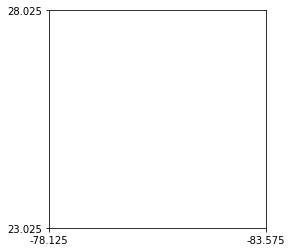

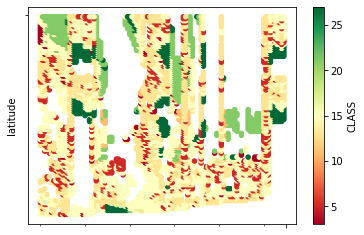

In [24]:
ax2 = countries.plot(color="lightgrey")
ax2.set_xlim(temp.longitude.min(), temp.longitude.max())
ax2.set_ylim(temp.latitude.min(), temp.latitude.max());
temp.plot.scatter(
    x = "longitude",
    y = "latitude",
    c="CLASS",
    cmap="RdYlGn"
)
plt.xticks('')
plt.yticks('');
